# 1. Poblem Definition
The members of the hospital wants to know whether there patients have heart disease or not.

# 2. Data
The data we will use is avialable on UCI on the following link:
https://archive.ics.uci.edu/ml/datasets/heart+disease

The data is also available on kaggle on the following link:
https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

# 3. Evaluation
Our focus is that can we get 95% accuracy on this dataset

# 4. Features 
What features we are using and what they mean (Data Dictionary)
It can be found on kaggle for the dataset we are using. 
* id (Unique id for each patient)
* age (Age of the patient in years)
* origin (place of study)
* sex (Male/Female)
* cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* chol (serum cholesterol in mg/dl)
* fbs (if fasting blood sugar * 120 mg/dl)
* restecg (resting electrocardiographic results)
-- Values: [normal, stt abnormality, lv hypertrophy]
* thalach: maximum heart rate achieved
* exang: exercise-induced angina (True/ False) (Do you feel chest pain during exercise)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by fluoroscopy
* thal: [normal; fixed defect; reversible defect]
* num: the predicted attribute

# Preparing our tools
We will use pandas, numpy and matplotlib for data analysis and manipulation

In [1]:
# Importing all the tools we need

# Regular EDA (explorarty data analysis) and plotting libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

# Load Data

In [4]:
df = pd.read_csv("drive/MyDrive/Heart-Disease-Classification/heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data Exploration (Exploratory Data Analysis EDA)
The goal here is to learn more and more about data (i.e. see the data dictionary) to understand it better and become a subject matter expert on the dataset you are working with.


In [5]:
df.shape

(303, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [10]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

##### As the values are almost equal so our classes (label 0 and label 1) are balanced

<Axes: >

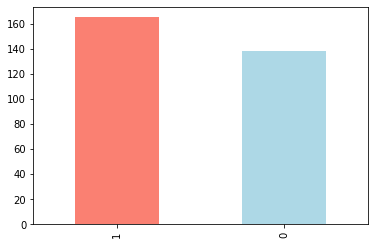

In [11]:
df['target'].value_counts().plot(kind = 'bar', color = ['salmon', 'lightblue'])

# Comparing the columns with target
Comparing columns to the target is important because in this way we can understand the impact of column on the target.

In [12]:
# Comparing the sex column
# 0 means women and 1 means men (from data dictionary)
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [13]:
# Let's see the data with crosstab to understand it more
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

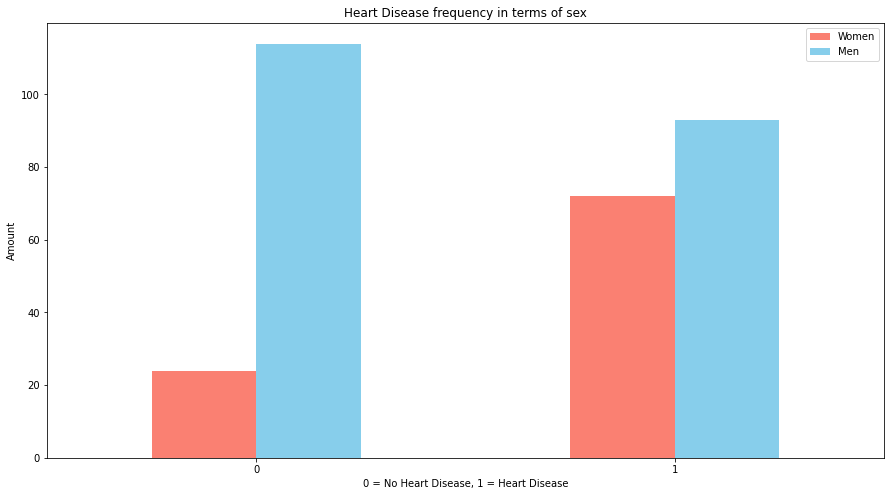

In [14]:
# Let's see it more visually by plotting it
pd.crosstab(df.target, df.sex).plot(kind = 'bar', 
                                    figsize = (15, 8),
                                    color = ['salmon', 'skyblue']);
plt.title('Heart Disease frequency in terms of sex')
plt.xlabel('0 = No Heart Disease, 1 = Heart Disease')
plt.ylabel('Amount')
plt.legend(['Women', 'Men'])
plt.xticks(rotation = 0)

# Age vs Max Heart Rate for Heart Disease
thalach: maximum heart rate achieved

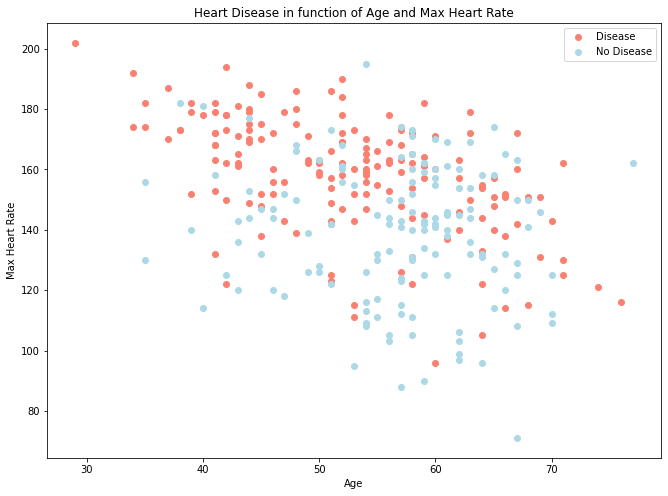

In [15]:
# Create another figure
plt.figure(figsize = (11, 8))

# Plotting the positive values with scatter on the figure
plt.scatter(df.age[df['target']==1],
            df.thalach[df['target'] == 1],
            color = 'salmon'
            )

# Plotting the negative values with scatter on the figure
plt.scatter(df.age[df['target'] == 0],
            df.thalach[df['target']==0],
            color = 'lightblue');

# Customizing the figure
plt.title('Heart Disease in function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease']);


### What we see from the figure is that drawing a line between heart disease and no heart disease is very difficult so we will let our model to decide it

### Checking the distribution of Age column with histogram

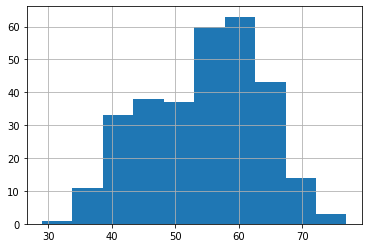

In [16]:
df.age.hist();

#### Histogram shows that the number of samples below 40 and above 70 are very less which means the values in our dataset that are <40 and >70 are outliers means that we will have to treat them better as they will be affect our output. Most data we have is  from age 50 to 60

# Checking the relationship of chest pain with heart disease for our dataset
cp: chest pain type:
0. typical angina:chest pain related decrease blood supply to heart
1. atypical angina: chest pain not related to heart
2. non-anginal: typically esophageal spasms (non-heart related)
3. asymptomatic: chest pain not showing signs of disease

In [17]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

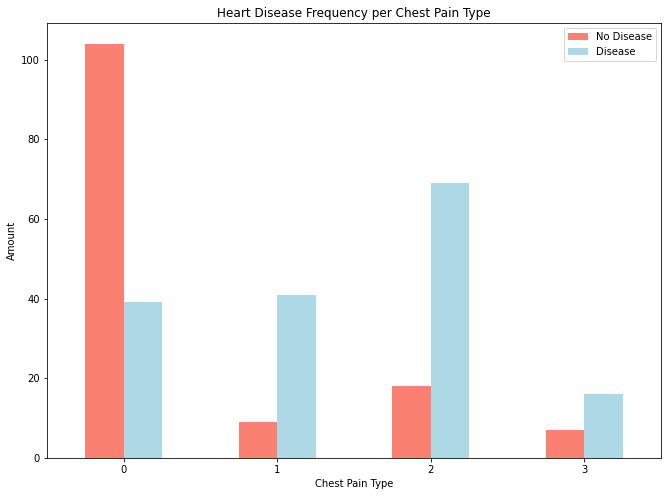

In [18]:
pd.crosstab(df.cp, df.target).plot(kind = 'bar',
                                   figsize = (11,8),
                                   color = ['salmon','lightblue'])
plt.title('Heart Disease Frequency per Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation = 0)

# Finding the correlation between columns

In [19]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


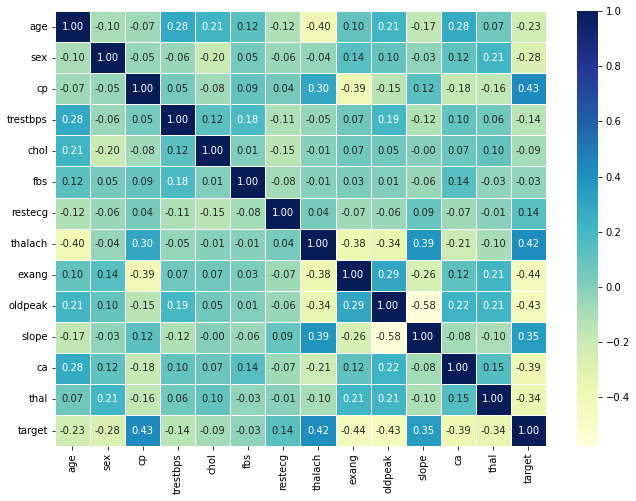

In [20]:
# Lets make it more visual
fig, ax = plt.subplots(figsize =(11, 8))

ax = sns.heatmap(df.corr(),
                 fmt ='.2f', # means format to 2 decimal places
                 annot = True,
                 linewidths = 0.5,
                 cmap = "YlGnBu")

# Modelling

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
# Split data into X and y
X = df.drop('target', axis = 1)
y = df['target']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [23]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
150,66,1,0,160,228,0,0,138,0,2.3,2,0,1
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3
133,41,1,1,110,235,0,1,153,0,0.0,2,0,2
156,47,1,2,130,253,0,1,179,0,0.0,2,0,2
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2
138,57,1,0,110,201,0,1,126,1,1.5,1,0,1


In [24]:
y_train

150    1
184    0
133    1
156    1
180    0
      ..
5      1
162    1
14     1
138    1
270    0
Name: target, Length: 242, dtype: int64

# We will use three models for training and experimentation:

1. LogisticRegression
2. KNeighborsClassifier
3. RandomForestClassifier

In [25]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
models = {
    'LogisticRegression': LogisticRegression(),
    'KNeighborsClassifier' : KNeighborsClassifier(),
    'RandomForestClassifier' : RandomForestClassifier()
}

# Fuction for training and evaluation
def fit_and_score(models, X_train, X_test, y_train, y_test):
  # Setting the random seed
  np.random.seed(42)
  model_scores = {}

  for model_name, model in models.items():
    # Fitting models on training data
    model.fit(X_train, y_train)
    # Evaluating models on test data
    model_scores[model_name] = model.score(X_test, y_test)
  return model_scores


In [26]:
models_evaluation = fit_and_score(models, X_train, X_test, y_train, y_test)
models_evaluation

{'LogisticRegression': 0.8852459016393442,
 'KNeighborsClassifier': 0.5737704918032787,
 'RandomForestClassifier': 0.8524590163934426}

In [27]:
models_evaluation_comparison = pd.DataFrame(models_evaluation, index = ['Accuracy'])

In [28]:
models_evaluation_comparison

,LogisticRegression,KNeighborsClassifier,RandomForestClassifier
Accuracy,0.885246,0.57377,0.852459


<Axes: >

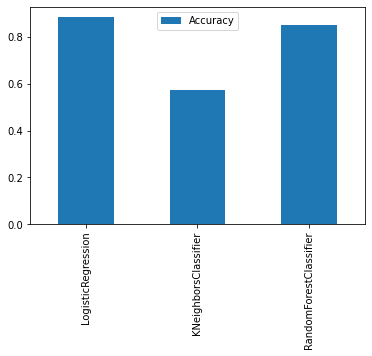

In [29]:
models_evaluation_comparison.T.plot.bar()

Now we can see that KNeighborsClassifier's performance is not as expected so we sacrifice it but without tuning the hyperparameters we will not sacrifice KNN, other two models are performing well.

### Hperparameter Tuning of KNN (By Hand)

In [30]:
train_set = []
test_set = []

# Create a range of different numbers for n_neighbors
neighbors = range(1,21)

# Setting up KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
  knn.set_params(n_neighbors = i)

  # Fit the algorithm
  knn.fit(X_train, y_train)

  # Updating the train_set list
  train_set.append(knn.score(X_train, y_train))

  # Updating the test_set list
  test_set.append(knn.score(X_test, y_test))

In [31]:
train_set

[1.0,
 0.8305785123966942,
 0.8057851239669421,
 0.7892561983471075,
 0.7644628099173554,
 0.7727272727272727,
 0.7355371900826446,
 0.7396694214876033,
 0.7396694214876033,
 0.7355371900826446,
 0.7272727272727273,
 0.7231404958677686,
 0.7066115702479339,
 0.731404958677686,
 0.7148760330578512,
 0.6983471074380165,
 0.7024793388429752,
 0.7231404958677686,
 0.7066115702479339,
 0.6983471074380165]

In [32]:
test_set

[0.5245901639344263,
 0.5409836065573771,
 0.6229508196721312,
 0.639344262295082,
 0.5737704918032787,
 0.6065573770491803,
 0.6065573770491803,
 0.639344262295082,
 0.6557377049180327,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6557377049180327,
 0.6557377049180327,
 0.6229508196721312,
 0.6229508196721312,
 0.6065573770491803,
 0.6557377049180327,
 0.6557377049180327,
 0.6885245901639344]

The maximum accuracy acheived by KNN is 68.85 %


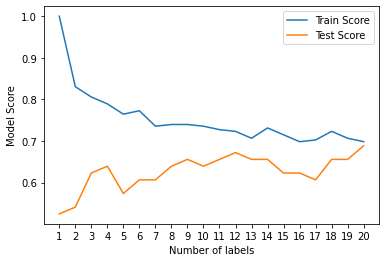

In [33]:
# Let's make the results more visual
plt.plot(neighbors, train_set, label = 'Train Score')
plt.plot(neighbors, test_set, label = 'Test Score')

plt.xlabel('Number of labels')
plt.ylabel('Model Score')
plt.legend()
plt.xticks(np.arange(1,21,1))
print(f'The maximum accuracy acheived by KNN is {max(test_set)*100:.2f} %')

### As the accuracy does not increase much as compare to ohter two models even tuning hyperparameters we will sacrifice this estimator.

# Hyperparameter Tuning with RandomizedSearchCV

1. For LogisticRegression
2. For RandomForestClassifier

In [34]:
# Creating a grid for LogisticRegression
log_reg_grid = {'C': np.logspace(-4, 4, 20),
                'solver': ['liblinear']}

# Creating a grid of params for RandomForestClassifier
rfc_grid = {'n_estimators': np.arange(10, 1000, 50),
            'max_depth': [None, 3, 5, 10],
            'min_samples_split': np.arange(2, 20, 2),
            'min_samples_leaf': np.arange(1, 20, 2)}

### 1. For LogisticRegression

In [35]:
# Now the grid is prepared, we will fit our RandomizedSearchCV on LogisticRegressor

np.random.seed(42)
log_reg_rs = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid,
                                n_iter = 20,
                                verbose = True,
                                cv = 5)

log_reg_rs.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [36]:
log_reg_rs.best_params_

{'solver': 'liblinear', 'C': 4.281332398719396}

In [37]:
# Evaluating the results
log_reg_rs.score(X_test, y_test)

0.8688524590163934

In [38]:
models_evaluation

{'LogisticRegression': 0.8852459016393442,
 'KNeighborsClassifier': 0.5737704918032787,
 'RandomForestClassifier': 0.8524590163934426}

### 2.For RandomForestClassifier

In [40]:
np.random.seed(42)
rf_rs = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rfc_grid,
                           n_iter = 20,
                           verbose = True
                           )
rf_rs.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [41]:
rf_rs.score(X_test, y_test)

0.9016393442622951

In [42]:
rf_rs.best_params_

{'n_estimators': 260,
 'min_samples_split': 8,
 'min_samples_leaf': 19,
 'max_depth': None}

#### As the RandomForestClassifier is performing best so we will do Hyperparameter Tuning with GridSearchCV on that.


In [47]:
# Now we will tune the hyperparameters of RandomForestClassifier with GridSearchCV
rf_grid = {
    'n_estimators': [260],
    'min_samples_split': [8],
    'min_samples_leaf': [19],
    'max_depth': [None]
}

rfc_gs = GridSearchCV(RandomForestClassifier(),
                         param_grid = rf_grid,
                         cv = 5,
                         verbose = True)
rfc_gs.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None], 'min_samples_leaf': [19],
                         'min_samples_split': [8], 'n_estimators': [260]},
             verbose=True)

In [48]:
rfc_gs.best_params_

{'max_depth': None,
 'min_samples_leaf': 19,
 'min_samples_split': 8,
 'n_estimators': 260}

In [49]:
rfc_gs.score(X_test, y_test)

0.8852459016393442

In [50]:
models_evaluation

{'LogisticRegression': 0.8852459016393442,
 'KNeighborsClassifier': 0.5737704918032787,
 'RandomForestClassifier': 0.8524590163934426}

We will use the parameters from RandomizedSearchCV (as we are getting our desired evaluation on that) and use them to fit the model as there is maximum accuracy on that then we will evaluate on our RandomFroestClassifier Model

In [51]:
# Create a RandomForestClassifier object with the best hyperparameters
rf_clf = RandomForestClassifier(n_estimators=260, min_samples_split=8, min_samples_leaf=19, max_depth=None, random_state=42)

# Fit the model on the training data
rf_clf.fit(X_train, y_train)

# Evaluate the model on the test data
rf_rs.score(X_test, y_test)


0.9016393442622951

In [53]:
# As we always need predicted labels for evaluation so creating y_preds
y_preds = rf_clf.predict(X_test)
y_preds

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1])

In [56]:
y_test

103    1
1      1
66     1
244    0
229    0
      ..
26     1
64     1
243    0
101    1
70     1
Name: target, Length: 61, dtype: int64

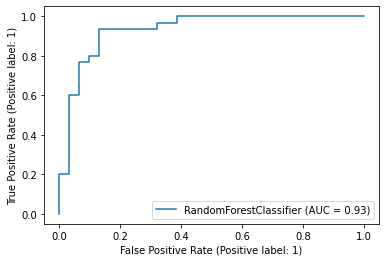

In [57]:
# ROC Curve
RocCurveDisplay.from_estimator(rf_clf,
               X_test,
               y_test)

In [58]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[27  4]
 [ 3 27]]


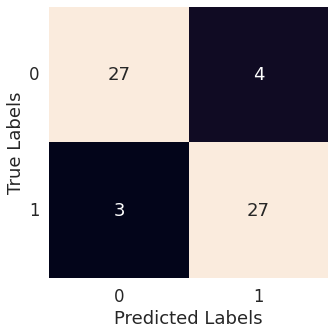

In [59]:
# Let's make the confusion matrix more visual
sns.set(font_scale = 1.5)
def heat_map(y_test, y_preds):

  fig, ax = plt.subplots(figsize = (5, 5))

  ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                   annot = True,
                   cbar = False)

  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.yticks(rotation = 0)
heat_map(y_test, y_preds)

In [60]:
# Calculating classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89        31
           1       0.87      0.90      0.89        30

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



# Calculating the Accuracy, Precision, Recall and f1_score with cross validation.


In [62]:
# Cross_Validated Accuracy
cv_acc = cross_val_score(rf_clf,
                X,
                y,
                cv = 5,
                scoring = 'accuracy')
cv_acc = np.mean(cv_acc)
cv_acc

0.8415300546448087

In [63]:
# Cross_Validated Precision
cv_precision = cross_val_score(rf_clf,
                X,
                y,
                cv = 5,
                scoring = 'precision')
cv_precision = np.mean(cv_precision)
cv_precision

0.8290487483792438

In [64]:
# Cross_Validated recall
cv_recall = cross_val_score(rf_clf,
                X,
                y,
                cv = 5,
                scoring = 'recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.8969696969696971

In [65]:
# Cross_Validated f1
cv_f1 = cross_val_score(rf_clf,
                X,
                y,
                cv = 5,
                scoring = 'f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.8605709726056858

<Axes: title={'center': 'Heart Disease evaluation metrics'}>

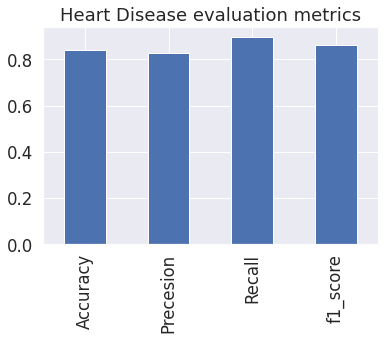

In [66]:
# Visualizing the Results
evaluation_metrics_df = pd.DataFrame({'Accuracy': cv_acc,
                                      'Precesion' : cv_precision,
                                      'Recall' : cv_recall,
                                      'f1_score' : cv_f1},
                                     index = [0])
evaluation_metrics_df.T.plot.bar(title = 'Heart Disease evaluation metrics', legend = False)

# Feature Importance:
Which features contributes most to the outcomes of the model and how did they contribute?

Feature importance for RandomForestClassifier

In [71]:
rf_clf.feature_importances_

array([0.05461528, 0.03446084, 0.15482369, 0.01156542, 0.01733358,
       0.        , 0.00907006, 0.15093122, 0.05490979, 0.11508167,
       0.07263594, 0.11681448, 0.20775803])

In [73]:
feature_dict = dict(zip(df.columns, rf_clf.feature_importances_))
print(feature_dict)

{'age': 0.054615277899039624, 'sex': 0.034460839508046404, 'cp': 0.15482369113560293, 'trestbps': 0.011565423800472504, 'chol': 0.017333581539520068, 'fbs': 0.0, 'restecg': 0.009070062722405767, 'thalach': 0.15093122249366886, 'exang': 0.054909791443826204, 'oldpeak': 0.11508166645753078, 'slope': 0.07263593686339188, 'ca': 0.11681447786032677, 'thal': 0.20775802827616827}


In [74]:
feature_df = pd.DataFrame(feature_dict, index = [0])

In [75]:
feature_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.054615,0.034461,0.154824,0.011565,0.017334,0.0,0.00907,0.150931,0.05491,0.115082,0.072636,0.116814,0.207758


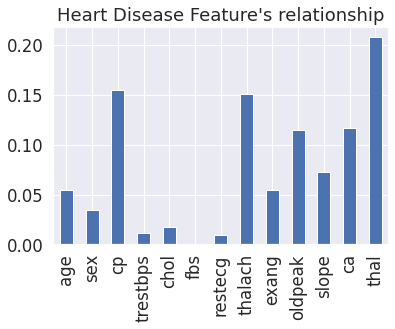

In [76]:
feature_df.T.plot.bar(title = 'Heart Disease Feature\'s relationship', legend = False);

In [79]:
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


In [81]:
pd.crosstab(df.slope, df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107
